# Deep Learning Project

## Cotton Plant Image Classification

 - This Project is about buliding a mobilnet model to classify Images of Disease and non Disease cotton plant.

  - Dataset contains 4 classes

    - Diseased cotton leaf
    - Diseased cotton plant
    - Fresh cotton leaf
    - Fresh cotton plant
 
## Image Classification Using CNN

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras import backend as K 

In [2]:
# Specify image height and width
img_width, img_height = 224,224
# specify path
train_dir = 'Data/train'
val_dir = 'Data/val'
test_dir = 'Data/test'

In [3]:
# Setting Image shape of RGB image 
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [4]:
# create batches of data from the train, valid, and test directories using Keras-ImageDataGenerator 

train_sets = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=train_dir,target_size=[224,224],batch_size=32)

val_sets = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=val_dir,target_size=[224,224],batch_size=32)

test_sets = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=test_dir,target_size=[224,224],batch_size=32,shuffle=False)

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


## Visualize The Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

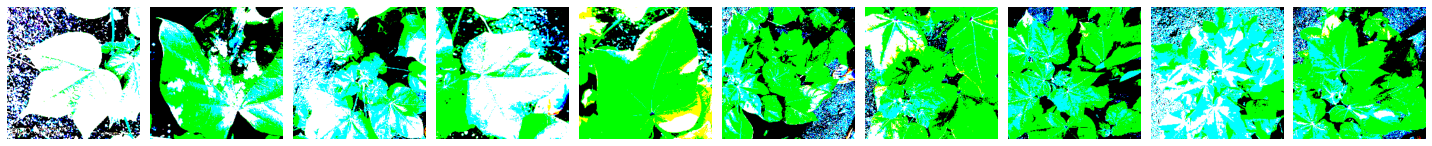

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [5]:
# labels for train images
imgs, labels = next(train_sets)
# function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# plotting train images
plotImages(imgs)
print(labels)

## Building CNN Model

In [6]:
# intializting Squential model
model=Sequential()
# Layer 1 
model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Layer 2
model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Layer 3
model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Layer 4 
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(4)) 
model.add(Activation('sigmoid')) 
# compiling Model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [7]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        8

In [8]:
# Fitting model 
r = model.fit(x=train_sets,
          steps_per_epoch=len(train_sets),
          validation_data=val_sets,
          validation_steps=len(val_sets),
          epochs=10,verbose=2)

Epoch 1/10
61/61 - 195s - loss: 7.0302 - accuracy: 0.3957 - val_loss: 0.7379 - val_accuracy: 0.3281
Epoch 2/10
61/61 - 171s - loss: 0.5563 - accuracy: 0.5202 - val_loss: 0.4022 - val_accuracy: 0.6126
Epoch 3/10
61/61 - 159s - loss: 0.4964 - accuracy: 0.5910 - val_loss: 0.2987 - val_accuracy: 0.7668
Epoch 4/10
61/61 - 157s - loss: 0.3900 - accuracy: 0.6817 - val_loss: 0.3259 - val_accuracy: 0.7194
Epoch 5/10
61/61 - 159s - loss: 0.3193 - accuracy: 0.7242 - val_loss: 0.2150 - val_accuracy: 0.8498
Epoch 6/10
61/61 - 159s - loss: 0.2938 - accuracy: 0.7417 - val_loss: 0.2477 - val_accuracy: 0.8103
Epoch 7/10
61/61 - 159s - loss: 0.2654 - accuracy: 0.7729 - val_loss: 0.2197 - val_accuracy: 0.8656
Epoch 8/10
61/61 - 157s - loss: 0.2735 - accuracy: 0.8022 - val_loss: 0.2535 - val_accuracy: 0.8498
Epoch 9/10
61/61 - 160s - loss: 0.2268 - accuracy: 0.8098 - val_loss: 0.1776 - val_accuracy: 0.8656
Epoch 10/10
61/61 - 156s - loss: 0.2062 - accuracy: 0.8211 - val_loss: 0.1734 - val_accuracy: 0.8893

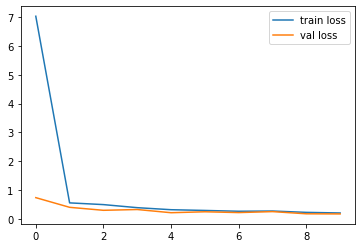

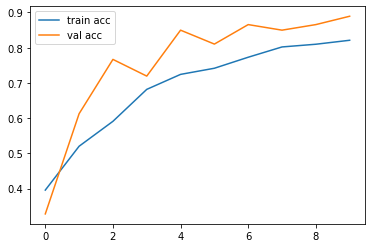

<Figure size 432x288 with 0 Axes>

In [9]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
# test labels
test_labels = test_sets.classes

In [12]:
# predictions
prediction =  model.predict(x=test_sets,steps=len(test_sets),verbose=0)

In [13]:
# creating Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=prediction.argmax(axis=1))

/home/niraj/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [14]:
# plot confusion matrix (function from sklearn)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  0  1  2]
 [ 1 27  0  0]
 [ 0  1 25  0]
 [ 0  9  0 18]]


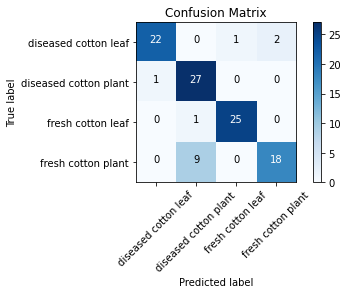

In [15]:
# plottin confusion matrix
import itertools
cm_plot_labels = test_sets.class_indices
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Validating images

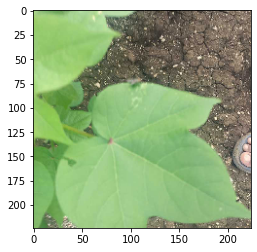

In [18]:
# importing Image
path = 'd (50)_iaip.jpg'
img = image.load_img(path,target_size=[224,224])
plt.imshow(img)
plt.show()

In [19]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Converting Image to array
X= image.img_to_array(img)
# prpocessing image
X=np.expand_dims(X,axis=0)
img_data=preprocess_input(X)
img_data.shape

(1, 224, 224, 3)

In [20]:
# predicting Image
model.predict(img_data)

array([[1.4904637e-05, 1.8233402e-07, 9.9959242e-01, 2.9449328e-07]],
      dtype=float32)

In [21]:
# Get class of prdiction
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])

In [22]:
# function for testing Images
def test_img(img_path):
    img = image.load_img(img_path,target_size=[224,224])
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    img_data=preprocess_input(X)
    a=np.argmax(model.predict(img_data), axis=1)
    if(a==0):
        print('Disease Leaf')
    elif(a==1):
        print('Disease Plant')
    elif(a==2):
        print('Fresh Leaf')
    else:
        print('Fresh Plant')

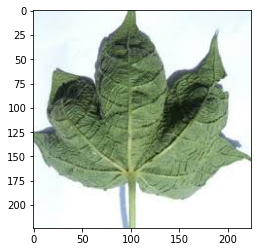

Fresh Leaf


In [25]:
# Testing image
path = 'curling_leaf.jpg'
img = image.load_img(path,target_size=[224,224])
plt.imshow(img)
plt.show()
test_img(path)